In [37]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

IMG_DIR = "flower_images/flower_images/"
CSV_DIR = "flower_images/flower_labels.csv"
DEST_DIR = "flower_images/flowers_grayscale2.csv"
flowers = pd.read_csv(CSV_DIR)

flower_images/flower_images/0001.png


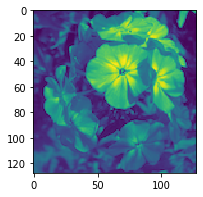

In [45]:
features = np.array([])
for index, row in flowers.iterrows():
    path = os.path.join(IMG_DIR, row["file"])
    img = cv2.imread(path)
    img = cv2.resize(img, (128, 128)) # 0208.png is not 128*128
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert image to grayscale
    
    if index == 0:
        print(path)
        plt.figure(figsize=(3,3))
        plt.imshow(img)
    
    if img is not None:      
        feature_matrix = np.zeros((128,128))

        A = img.flatten()
        new_entry = np.append(A, row["label"])

        
        if features.size == 0:
            features = new_entry
        else:
            features = np.vstack( (features, new_entry) )

In [46]:
print(features.shape)

(210, 16385)


In [47]:
np.savetxt(DEST_DIR, features, delimiter=",")